## Clustering Analysis of Global Malnutrition Data by Country

##### **Dataset:** https://www.kaggle.com/datasets/ruchi798/malnutrition-across-the-globe

##### **Objective:** To cluster global malnutrition data as a foundation for generating future insights and informed strategies.

# Importing library and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('country-wise-average.csv')

# Data Understanding

In [3]:
df.head()

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,0.0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
1,ALBANIA,2.0,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
2,ALGERIA,2.0,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
3,ANGOLA,1.0,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
4,ARGENTINA,2.0,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750


In [4]:
df.columns

Index(['Country', 'Income Classification', 'Severe Wasting', 'Wasting',
       'Overweight', 'Stunting', 'Underweight', 'U5 Population ('000s)'],
      dtype='object')

In [5]:
df.shape

(152, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                152 non-null    object 
 1   Income Classification  152 non-null    float64
 2   Severe Wasting         140 non-null    float64
 3   Wasting                150 non-null    float64
 4   Overweight             149 non-null    float64
 5   Stunting               151 non-null    float64
 6   Underweight            150 non-null    float64
 7   U5 Population ('000s)  152 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.6+ KB


In [7]:
df.isna().sum()

Country                   0
Income Classification     0
Severe Wasting           12
Wasting                   2
Overweight                3
Stunting                  1
Underweight               2
U5 Population ('000s)     0
dtype: int64

In [8]:
df['Severe Wasting'].fillna(df['Severe Wasting'].median(), inplace=True)
df['Wasting'].fillna(df['Severe Wasting'].median(), inplace=True)
df['Overweight'].fillna(df['Overweight'].median(), inplace=True)
df['Underweight'].fillna(df['Underweight'].median(), inplace=True)
df['Stunting'].fillna(df['Stunting'].median(), inplace=True)

In [9]:
df.isna().sum()

Country                  0
Income Classification    0
Severe Wasting           0
Wasting                  0
Overweight               0
Stunting                 0
Underweight              0
U5 Population ('000s)    0
dtype: int64

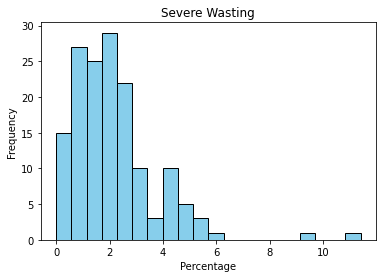

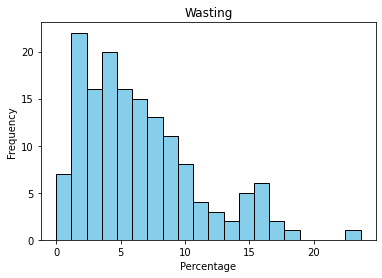

In [10]:
plt.hist(df['Severe Wasting'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Severe Wasting')
plt.show()

plt.hist(df['Wasting'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Wasting')
plt.show()

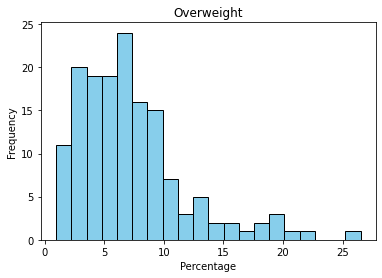

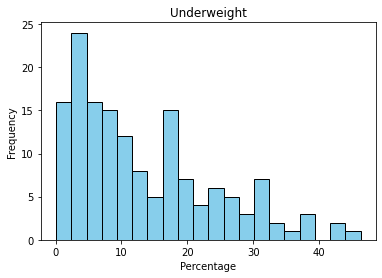

In [11]:
plt.hist(df['Overweight'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Overweight')
plt.show()

plt.hist(df['Underweight'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Underweight')
plt.show()

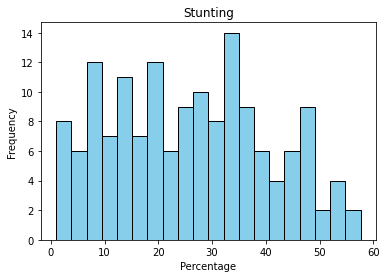

In [12]:
plt.hist(df['Stunting'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Stunting')
plt.show()

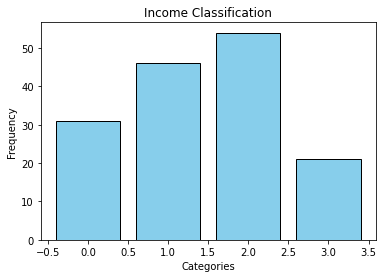

In [13]:
category_counts = df['Income Classification'].value_counts()

# Create bar plot
plt.bar(category_counts.index, category_counts.values, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Income Classification')

# Show the plot
plt.show()


## Checking Outliers of each variables

<AxesSubplot:>

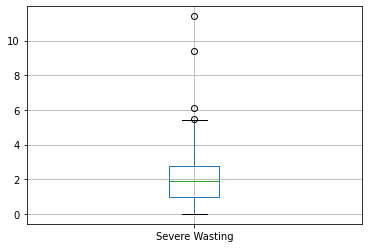

In [14]:
#Check Outliers
df.boxplot(column=['Severe Wasting'])

<AxesSubplot:>

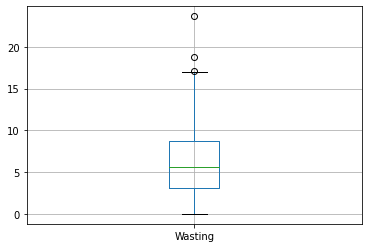

In [15]:
df.boxplot(column=['Wasting'])

<AxesSubplot:>

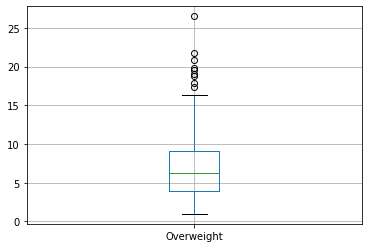

In [16]:
df.boxplot(column=['Overweight'])

<AxesSubplot:>

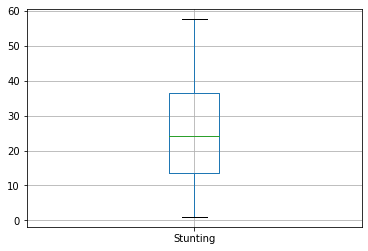

In [17]:
df.boxplot(column=['Stunting'])

<AxesSubplot:>

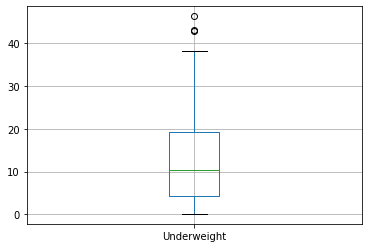

In [18]:
df.boxplot(column=['Underweight'])

In [19]:
df['Income Classification'].value_counts()

2.0    54
1.0    46
0.0    31
3.0    21
Name: Income Classification, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                152 non-null    object 
 1   Income Classification  152 non-null    float64
 2   Severe Wasting         152 non-null    float64
 3   Wasting                152 non-null    float64
 4   Overweight             152 non-null    float64
 5   Stunting               152 non-null    float64
 6   Underweight            152 non-null    float64
 7   U5 Population ('000s)  152 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.6+ KB


# Feature Engineering

In [21]:
from sklearn.preprocessing import MinMaxScaler
df_input=df.drop('Country', axis = 1)
scaler = MinMaxScaler()
df_input = scaler.fit_transform(df_input)

# Machine Learning Model

In [22]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [23]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    cluster_label=kmeanModel.fit_predict(df_input)
    #calculate silhouette_score for each cluster
    silhouette_avg = silhouette_score(df_input, cluster_label)
    print(
        "For n_clusters =",k,
        "The average silhouette_score is :",silhouette_avg,
        )
    #kmeans inertia_ attribute is:  sum of squared distances of samples #to their closest cluster center.
    distortions.append(kmeanModel.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.43478849425209853
For n_clusters = 3 The average silhouette_score is : 0.33823858784467603
For n_clusters = 4 The average silhouette_score is : 0.25285191448689875
For n_clusters = 5 The average silhouette_score is : 0.26809910794431313
For n_clusters = 6 The average silhouette_score is : 0.2695199854456539
For n_clusters = 7 The average silhouette_score is : 0.2851082814695123
For n_clusters = 8 The average silhouette_score is : 0.2767278241572059
For n_clusters = 9 The average silhouette_score is : 0.25731966871520734


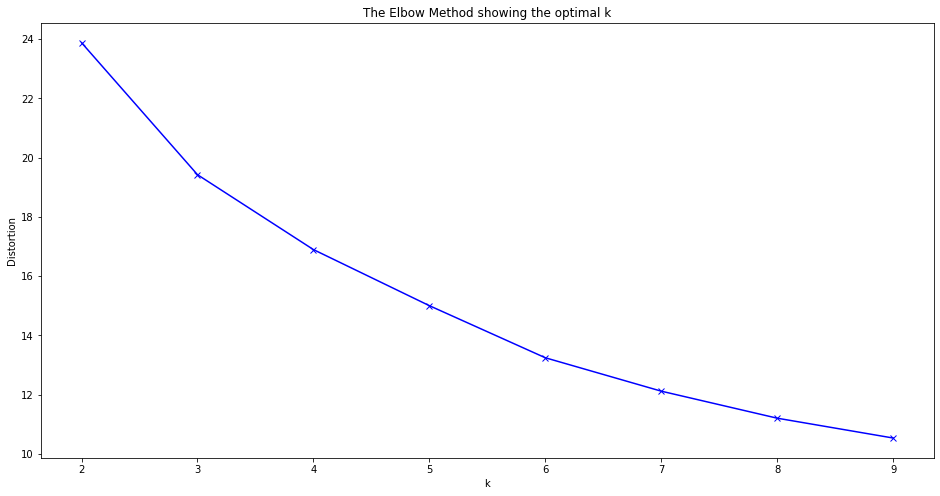

In [24]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

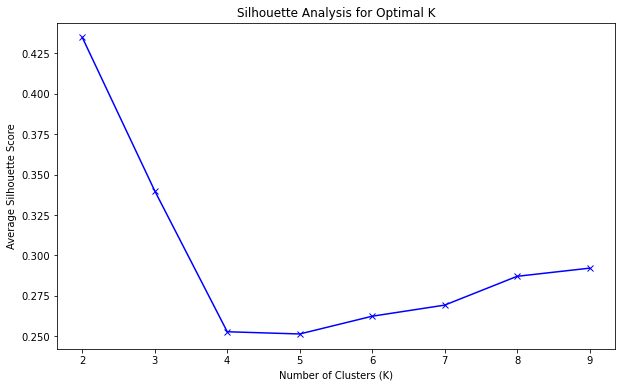

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

distortions = []
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    cluster_label = kmeanModel.fit_predict(df_input)
    
    silhouette_avg = silhouette_score(df_input, cluster_label)
    silhouette_scores.append(silhouette_avg)

    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

kmeans = KMeans(n_clusters=6)
kmeans.fit(df_input)

silhouette = silhouette_score(df_input, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(df_input, kmeans.labels_)
davies_bouldin = davies_bouldin_score(df_input, kmeans.labels_)

print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")


Silhouette Score: 0.2602984602280413
Calinski-Harabasz Index: 79.1983167221268
Davies-Bouldin Index: 1.2307731478417672


In [27]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df_input)

KMeans(n_clusters=3)

In [28]:
df['k_means']=kmeanModel.predict(df_input)

In [29]:
df['k_means'].value_counts()

0    75
2    49
1    28
Name: k_means, dtype: int64

In [30]:
kmeanModel = KMeans(n_clusters=6)
kmeanModel.fit(df_input)

KMeans(n_clusters=6)

In [31]:
df['k_means']=kmeanModel.predict(df_input)

In [32]:
df['k_means'].value_counts()

4    38
3    33
1    29
2    21
5    19
0    12
Name: k_means, dtype: int64

In [60]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# we use MinMaxScaler
scaler = MinMaxScaler()
df_input_scaled = scaler.fit_transform(df_input)

# use PCA to reduce the dimension into 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_input_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# KMeans on the reduced data
kmeans = KMeans(n_clusters=6, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

# interactive scatter plot of the clusters
fig = px.scatter(
    df_pca,
    x='PC1',
    y='PC2',
    color='Cluster',
    symbol='Cluster',
    opacity=0.7,
    size_max=10,
    title='KMeans Clustering Results with PCA in 2D Using MinMaxScaler',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
)

fig.show()


In [34]:
df.head()

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),k_means
0,AFGHANISTAN,0.0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500,1
1,ALBANIA,2.0,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800,0
2,ALGERIA,2.0,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143,0
3,ANGOLA,1.0,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000,1
4,ARGENTINA,2.0,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750,4


# Cluster or Persona Analysis

### Cluster 0

In [35]:
cluster_0=df[df['k_means']==0]

In [36]:
cluster_0.describe()

,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),k_means
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,1.916667,2.391250,5.077579,18.318135,16.753294,4.426706,1123.786276,0.0
std,0.288675,0.994840,1.797882,3.920539,7.926773,2.813283,1680.375494,0.0
min,1.000000,0.850000,2.566667,12.833333,5.150000,1.600000,13.900500,0.0
25%,2.000000,1.675000,3.830000,15.605000,10.362500,2.025000,201.648067,0.0
50%,2.000000,2.225000,4.833333,18.875000,16.485000,3.665000,344.693250,0.0
75%,2.000000,2.998333,6.148810,20.050000,23.215000,7.210714,1006.451750,0.0
max,2.000000,4.075000,8.200000,26.500000,29.071429,9.714286,5274.622000,0.0


In [39]:
cluster_0.head()

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),k_means
1,ALBANIA,2.0,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800,0
2,ALGERIA,2.0,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143,0
5,ARMENIA,2.0,1.600000,3.940000,13.620000,16.120000,3.480000,204.145200,0
16,BOSNIA AND HERZEGOVINA,2.0,2.200000,4.566667,19.800000,10.933333,2.466667,194.156667,0
52,GEORGIA,2.0,0.850000,2.566667,19.533333,14.000000,2.066667,252.580000,0


In [37]:
feature_variances = cluster_0.std()

feature_variances = cluster_0.drop(columns = ["U5 Population ('000s)", "k_means"]).std()

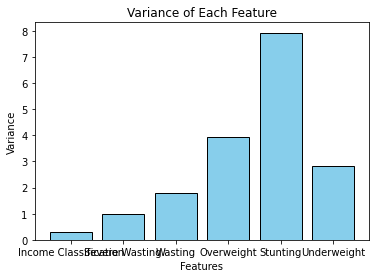

In [38]:
plt.bar(feature_variances.index, feature_variances.values, color='skyblue', edgecolor='black')

plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Variance of Each Feature')

plt.show()

### Cluster 1 

In [40]:
cluster_1=df[df['k_means']==1]

In [41]:
cluster_1.describe()

,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),k_means
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.0
mean,0.172414,2.472700,8.233871,4.027953,40.641692,22.734368,3515.831504,1.0
std,0.384426,0.854335,2.206510,1.895651,7.819132,6.271680,3480.750990,0.0
min,0.000000,1.260000,4.522222,1.028571,23.700000,10.933333,243.326750,1.0
25%,0.000000,1.920000,6.800000,2.400000,34.922727,17.740000,982.526700,1.0
50%,0.000000,2.425000,8.290909,3.660000,40.300000,22.900000,2409.566800,1.0
75%,0.000000,3.016667,9.771429,5.750000,46.466667,26.671429,4918.561500,1.0
max,1.000000,4.457143,13.242857,7.484615,57.600000,36.950000,13942.345571,1.0


In [62]:
cluster_1.head()

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),k_means
0,AFGHANISTAN,0.0,3.033333,10.350000,5.125,47.775000,30.375000,4918.561500,1
3,ANGOLA,1.0,2.400000,6.933333,2.550,42.633333,23.600000,3980.054000,1
13,BENIN,0.0,2.425000,7.700000,2.275,35.375000,20.125000,1476.525750,1
21,BURKINA FASO,0.0,4.169231,12.730769,2.250,33.346154,25.076923,2796.190615,1
22,BURUNDI,0.0,1.260000,6.666667,1.775,57.600000,32.250000,1497.888000,1


In [42]:
feature_variances1 = cluster_1.std()

feature_variances1 = cluster_1.drop(columns = ["U5 Population ('000s)", "k_means"]).std()


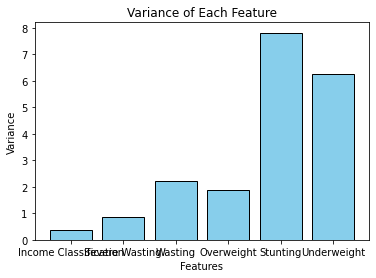

In [43]:
plt.bar(feature_variances1.index, feature_variances1.values, color='skyblue', edgecolor='black')

plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Variance of Each Feature')

plt.show()

### Cluster 2 

In [44]:
cluster_2=df[df['k_means']==2]

In [45]:
cluster_2.describe()

,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),k_means
count,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,3.0,1.149734,3.090389,7.405151,9.062615,4.766757,2054.896719,2.0
std,0.0,1.064351,2.397874,3.274793,6.950668,3.680045,4378.804771,0.0
min,3.0,0.000000,0.000000,1.500000,1.000000,0.100000,8.106500,2.0
25%,3.0,0.333333,1.366667,5.550000,2.914286,1.500000,113.713333,2.0
50%,3.0,1.000000,2.383333,7.500000,7.100000,4.300000,346.002667,2.0
75%,3.0,1.872500,3.700000,9.166667,14.242857,6.950000,1951.373000,2.0
max,3.0,4.500000,7.783333,13.875000,24.160000,11.916667,20077.909571,2.0


In [61]:
cluster_2.head()

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),k_means
6,AUSTRALIA,3.0,0.0000,0.0000,13.875,1.00,0.10,1443.0745,2
8,BAHRAIN,3.0,1.8725,6.7000,7.500,13.75,6.95,63.3710,2
10,BARBADOS,3.0,2.0000,6.8000,12.200,7.70,3.50,16.6530,2
19,BRUNEI DARUSSALAM,3.0,0.4000,2.9000,8.300,19.70,9.60,31.3370,2
26,CANADA,3.0,1.8725,1.8725,10.400,24.16,10.38,1697.6030,2


In [46]:
feature_variances2 = cluster_2.std()

feature_variances2= cluster_2.drop(columns = ["U5 Population ('000s)", "k_means"]).std()

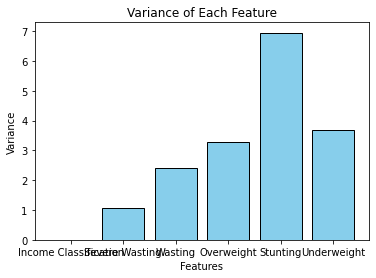

In [47]:
plt.bar(feature_variances2.index, feature_variances2.values, color='skyblue', edgecolor='black')

plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Variance of Each Feature')

plt.show()

### Cluster 3 

In [48]:
cluster_3=df[df['k_means']==3]

In [49]:
cluster_3.describe()

,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),k_means
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.0
mean,1.151515,1.935281,6.004740,7.709003,31.228476,12.571607,1424.515008,3.0
std,0.441674,1.126404,3.399826,3.794174,7.848591,4.356434,1926.004248,0.0
min,0.000000,0.275000,1.700000,2.115385,19.916667,4.366667,1.000000,3.0
25%,1.000000,1.100000,3.500000,4.800000,26.600000,8.640000,107.675000,3.0
50%,1.000000,1.872500,5.790000,7.228571,29.728571,12.750000,642.159000,3.0
75%,1.000000,2.425000,7.622222,9.925000,34.800000,16.750000,2083.494500,3.0
max,2.000000,5.400000,17.000000,17.825000,54.100000,19.575000,8911.539818,3.0


In [63]:
cluster_3.head()

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),k_means
14,BHUTAN,1.0,1.400000,4.525000,5.100000,44.250000,17.800000,74.796750,3
15,BOLIVIA (PLURINATIONAL STATE OF),1.0,0.700000,1.900000,8.600000,29.728571,7.472727,1104.222182,3
17,BOTSWANA,2.0,2.850000,8.800000,10.050000,31.033333,12.666667,226.709000,3
23,CABO VERDE,1.0,1.872500,5.550000,6.300000,24.100000,12.750000,60.583000,3
25,CAMEROON,1.0,1.814286,5.671429,8.042857,33.742857,14.685714,3170.714286,3


In [50]:
feature_variances3 = cluster_3.std()

feature_variances3= cluster_3.drop(columns = ["U5 Population ('000s)", "k_means"]).std()

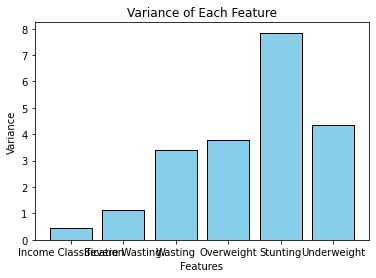

In [51]:
plt.bar(feature_variances3.index, feature_variances3.values, color='skyblue', edgecolor='black')

plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Variance of Each Feature')

plt.show()

### Cluster 4 

In [52]:
cluster_4=df[df['k_means']==4]

In [53]:
cluster_4.describe()

,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),k_means
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0
mean,1.921053,1.142077,3.802522,7.176745,14.106071,5.375689,4641.656312,4.0
std,0.273276,0.637270,2.264967,2.126479,6.258172,3.452379,15847.986176,0.0
min,1.000000,0.200000,0.793333,2.800000,2.500000,1.300000,1.000000,4.0
25%,2.000000,0.662500,2.234375,5.811184,9.010000,2.830000,216.497750,4.0
50%,2.000000,0.920526,3.489167,6.660000,13.176667,4.281429,745.487333,4.0
75%,2.000000,1.568333,4.583333,8.985000,18.997917,7.683333,2889.081824,4.0
max,2.000000,2.575000,11.600000,12.733333,28.750000,18.140000,97488.133417,4.0


In [64]:
cluster_4.head()

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),k_means
4,ARGENTINA,2.0,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750,4
7,AZERBAIJAN,2.0,2.575000,5.433333,9.183333,21.816667,8.083333,740.501667,4
11,BELARUS,2.0,0.600000,2.200000,9.700000,4.500000,1.300000,445.676000,4
12,BELIZE,2.0,0.833333,2.333333,9.600000,18.766667,5.300000,36.104500,4
18,BRAZIL,2.0,0.700000,2.300000,6.250000,13.133333,3.925000,17071.496000,4


In [54]:
feature_variances4 = cluster_4.std()

feature_variances4 = cluster_4.drop(columns = ["U5 Population ('000s)", "k_means"]).std()

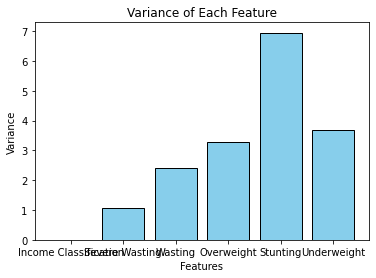

In [55]:
plt.bar(feature_variances2.index, feature_variances2.values, color='skyblue', edgecolor='black')

plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Variance of Each Feature')

plt.show()

### Cluster 5 

In [56]:
cluster_5=df[df['k_means']==5]

In [57]:
cluster_5.describe()

,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),k_means
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0
mean,0.789474,4.961582,15.072101,3.826013,41.350001,32.345195,12238.715620,5.0
std,0.630604,2.137755,2.926830,2.215248,9.286451,6.889132,28178.898105,0.0
min,0.000000,2.450000,10.514286,0.962500,21.862500,22.625000,36.045400,5.0
25%,0.000000,4.073214,13.862143,2.518750,33.960000,26.357576,647.448879,5.0
50%,1.000000,4.500000,15.242857,3.040000,41.260000,30.871429,2017.326333,5.0
75%,1.000000,5.037500,15.771250,4.800000,47.863492,37.667857,10694.220250,5.0
max,2.000000,11.400000,23.650000,8.450000,55.380000,46.266667,123014.491000,5.0


In [65]:
cluster_5.head()

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),k_means
9,BANGLADESH,1.0,2.813636,14.537500,0.962500,54.229167,46.266667,15837.427500,5
24,CAMBODIA,1.0,3.483333,11.466667,3.033333,43.683333,31.983333,1651.662167,5
28,CHAD,0.0,5.500000,15.240000,3.040000,41.260000,31.400000,2024.290400,5
40,DJIBOUTI,1.0,9.400000,17.075000,8.250000,30.075000,22.625000,99.445250,5
46,ERITREA,0.0,4.633333,14.600000,1.666667,53.225000,37.550000,407.654500,5


In [58]:
feature_variances5 = cluster_5.std()

feature_variances5= cluster_5.drop(columns = ["U5 Population ('000s)", "k_means"]).std()

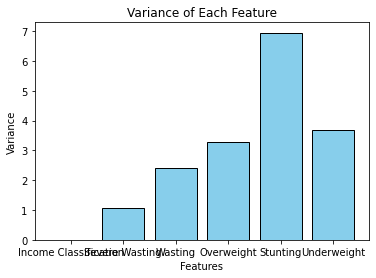

In [59]:
plt.bar(feature_variances5.index, feature_variances2.values, color='skyblue', edgecolor='black')

plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Variance of Each Feature')

plt.show()

Thank you for reviewing our Python code on K Means Clustering. In summary, our approach involved initial steps of data understanding and preparation to optimize our model. We then determined the most suitable value for K using the elbow method, followed by evaluating the silhouette score for each K. Once the model was established, we transformed the clustered values into an interactive 2D scatter plot. This dynamic plot allows users to explore clusters by dragging the mouse over data points, revealing the cluster and the coordinates of principal components 1 and 2. Following the visualization, we conducted a persona analysis. This step is crucial because, after clustering the data, it's essential to understand what each cluster represents. By performing persona analysis, we unveil insights into the characteristics defining each cluster, shedding light on the factors influencing the model's clustering decisions. This in-depth understanding enhances the interpretability and practical application of the clustering results.